The 'consolidated_before' and 'consolidated_after' CSV files have to be generated from the python script 'consolidate_imperative_scores.py'.

In [59]:
import pandas as pd
from scipy.stats import wilcoxon, shapiro, kruskal, alexandergovern

df_before = pd.read_csv('consolidated_before.csv')
df_after = pd.read_csv('consolidated_after.csv')

In [60]:
df_before = df_before.set_index('Path', verify_integrity=True)
df_after = df_after.set_index('Path', verify_integrity=True)

In [61]:
keys_b = df_before.index.to_list()
keys_a = df_after.index.to_list()
print(df_before.index.size)
print(keys_b[0], keys_a[0])
print(keys_a[0] in df_before.index.to_list())

keys_a = list(map(lambda s : s.replace('after', 'before'), keys_a))
print(keys_a[0] in df_before.index.to_list())

df_before = df_before.loc[keys_a]
print(df_before.index.size)

1531
'../in/flagged_repos/Argu/before\9adb3beba259883dd5dfb11da73a03d118fefe1c\ArgumentParser.fs' '../in/flagged_repos/Argu/after\9adb3beba259883dd5dfb11da73a03d118fefe1c\ArgumentParser.fs'
False
True
1531


In [62]:
def generate_ratio(df, key_num, key_div):
    return df[key_num].div(df[key_div]).apply(lambda x : x  * 1000)

def insert_columns(df, cols):
    for c in cols:
        # insert column name, column at the front
        df.insert(0, c[0], c[1])

In [63]:
mutable_ratio_before = df_before[' MutableCount'].div(df_before[' TokenCount']).apply(lambda x : x  * 1000)
df_before.insert(len(df_before.columns), 'MutableRatio', mutable_ratio_before)
sum_ratio_before = (df_before[' MutableCount'] + df_before[' ArrayCount'] + df_before[' LoopCount'] + df_before[' ExceptionCount'] + df_before[' IOCount']).div(df_before[' TokenCount']).apply(lambda x : x  * 1000)
df_before.insert(len(df_before.columns), 'ImpRatio', sum_ratio_before)

mutable_ratio_after = df_after[' MutableCount'].div(df_after[' TokenCount']).apply(lambda x : x  * 1000)
df_after.insert(len(df_after.columns), 'MutableRatio', mutable_ratio_after)
sum_ratio_after = (df_after[' MutableCount'] + df_after[' ArrayCount'] + df_after[' LoopCount'] + df_after[' ExceptionCount'] + df_after[' IOCount']).div(df_after[' TokenCount']).apply(lambda x : x  * 1000)
df_after.insert(len(df_after.columns), 'ImpRatio', sum_ratio_after)

cols_b = [('LoopRatio', generate_ratio(df_before, ' LoopCount', ' TokenCount')), ('ArrayRatio', generate_ratio(df_before, ' ArrayCount', ' TokenCount'))]
insert_columns(df_before, cols_b)

cols_a = [('LoopRatio', generate_ratio(df_after, ' LoopCount', ' TokenCount')), ('ArrayRatio', generate_ratio(df_after, ' ArrayCount', ' TokenCount'))]
insert_columns(df_after, cols_a)


In [64]:
print(df_before.keys())
print(df_after.keys())
print('mutableratio skew', df_before['MutableRatio'].skew())
print('consolidated skew', df_before['ImpRatio'].skew())

df_before["ImpRatio"].describe()

Index(['ArrayRatio', 'LoopRatio', ' MutableCount', ' DoCount', ' LoopCount',
       ' ArrayCount', ' ExceptionCount', ' IOCount', ' TokenCount',
       'MutableRatio', 'ImpRatio'],
      dtype='object')
Index(['ArrayRatio', 'LoopRatio', ' MutableCount', ' DoCount', ' LoopCount',
       ' ArrayCount', ' ExceptionCount', ' IOCount', ' TokenCount',
       'MutableRatio', 'ImpRatio'],
      dtype='object')
mutableratio skew 3.962898393723078
consolidated skew 2.623091654231035


count    1531.000000
mean        3.997879
std         5.344253
min         0.000000
25%         0.000000
50%         2.010263
75%         5.850868
max        61.889251
Name: ImpRatio, dtype: float64

In [65]:
# Tests for normality
print("Wilcoxon Signed Rank Null Hypothesis: the distribution of X - Y is symmetric about zero")

print('\n========================Mutable keyword statistics========================')
print('normality before:', shapiro(df_before['MutableRatio']))
print('normality after:', shapiro(df_after['MutableRatio']))
print('wilcoxon signed rank:', wilcoxon(df_before['MutableRatio'], df_after['MutableRatio']))
print('wilcoxon signed rank:', wilcoxon(df_before['MutableRatio'], df_after['MutableRatio'], alternative="greater"))

print('\n========================Loop keyword statistics========================')
print('normality before:', shapiro(df_before['LoopRatio']))
print('normality after:', shapiro(df_after['LoopRatio']))
print('wilcoxon signed rank:', wilcoxon(df_before['LoopRatio'], df_after['LoopRatio']))
print('wilcoxon signed rank:', wilcoxon(df_before['LoopRatio'], df_after['LoopRatio'], alternative="greater"))

print('\n========================Array keyword statistics========================')
print('normality before:', shapiro(df_before['ArrayRatio']))
print('normality after:', shapiro(df_after['ArrayRatio']))
print('wilcoxon signed rank:', wilcoxon(df_before['ArrayRatio'], df_after['ArrayRatio']))
print('wilcoxon signed rank:', wilcoxon(df_before['ArrayRatio'], df_after['ArrayRatio'], alternative="greater"))
print('wilcoxon signed rank:', wilcoxon(df_before['ArrayRatio'], df_after['ArrayRatio'], alternative="less"))

print('\n========================Consolidated statistics========================')
print('normality before:', shapiro(df_before['ImpRatio']))
print('normality after:', shapiro(df_after['ImpRatio']))
print('wilcoxon signed rank:', wilcoxon(df_before['ImpRatio'], df_after['ImpRatio'], nan_policy="raise"))
print('kruskal:', kruskal(df_before['ImpRatio'], df_after['ImpRatio']))
print('alexandergovern:', alexandergovern(df_before['ImpRatio'], df_after['ImpRatio']))
print('wilcoxon signed rank (before > after):', wilcoxon(df_before['ImpRatio'], df_after['ImpRatio'], alternative="greater"))

Wilcoxon Signed Rank Null Hypothesis: the distribution of X - Y is symmetric about zero

========================Mutable keyword statistics========================
normality before: ShapiroResult(statistic=0.56400465965271, pvalue=0.0)
normality after: ShapiroResult(statistic=0.5675939321517944, pvalue=0.0)
wilcoxon signed rank: WilcoxonResult(statistic=76811.5, pvalue=1.0028415454859123e-05)
wilcoxon signed rank: WilcoxonResult(statistic=116319.5, pvalue=5.014207727429562e-06)

========================Loop keyword statistics========================
normality before: ShapiroResult(statistic=0.4987138509750366, pvalue=0.0)
normality after: ShapiroResult(statistic=0.5021241903305054, pvalue=0.0)
wilcoxon signed rank: WilcoxonResult(statistic=41976.5, pvalue=5.71976024869843e-08)
wilcoxon signed rank: WilcoxonResult(statistic=75393.5, pvalue=2.859880124349215e-08)

========================Array keyword statistics========================
normality before: ShapiroResult(statistic=0.36922734

<AxesSubplot: >

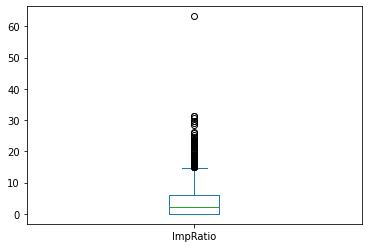

In [66]:
df_after['ImpRatio'].plot.box()

1531


<AxesSubplot: >

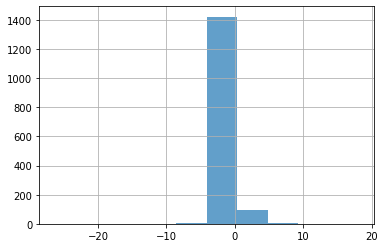

In [70]:
df_before.reset_index(inplace=True)
df_after.reset_index(inplace=True)
impratio_delta = df_after['ImpRatio'].subtract(df_before['ImpRatio'])
impratio_reverse_delta = df_before['ImpRatio'].subtract(df_after['ImpRatio'])
print(impratio_delta.count())
impratio_delta.hist(alpha=0.7)

In [68]:
projs = pd.read_csv('proj_deltas.csv')
projs['imp_ratio'].apply(lambda x : x if x > 0 else -x).describe()

count    114.000000
mean       0.022271
std        0.187405
min        0.000000
25%        0.000000
50%        0.000000
75%        0.002963
max        2.000000
Name: imp_ratio, dtype: float64

In [69]:
total = result = 0
for e in impratio_delta:
    total += 1
    if e < 0:
        result += 1
print(total, result)
#impratio_delta.hist()

1531 547
